# SMAI Assignment - 2

## Question 4: Multi-layer Perceptrons

### Digit Classification

In this question, you will perform digit classification using MLP. You can use the MLPClassifier from sklearn. Train and two test sets have been provided [here](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing). Report the accuracy and any other interesting observations.

In [91]:
import numpy as np
import h5py
from collections import Counter
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [92]:
# train = h5py.File("training_3digits.hdf5",'r')
# test1 = h5py.File("testing_3digits_part1.hdf5",'r')
# test2 = h5py.File("testing_3digits_part2.hdf5",'r')

# !gdown 1p0d4F4BZI_4rx0m3mGf8n93RZNxzDL1J
# !gdown 1YrJJKVDXeJbO3jpgtP_dWXC1A9uMKDo7
# !gdown 1RZTYmuDfbGLQlZPlpUHMTKoPxLmP3I9u
train = h5py.File("/content/training_3digits.hdf5",'r')
test1 = h5py.File("/content/testing_3digits_part1.hdf5",'r')
test2 = h5py.File("/content/testing_3digits_part2.hdf5",'r')

In [93]:
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
print(train_images.shape)
print(train_digits.shape)
train.close()
# gray_train_images = np.dot(train_images[...,:3], [0.2989, 0.5870, 0.1140])
gray_train_images = np.all(train_images, axis=-1)
# print(gray_train_images.shape)
train_digits_dict = dict(Counter(train_digits))
print(train_digits_dict)

(2726, 28, 28, 3)
(2726,)
{2: 858, 1: 1000, 0: 868}


In [94]:
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
print(test_images_1.shape)
print(test_digits_1.shape)
test1.close()
# gray_test_images_1 = np.dot(test_images_1[...,:3], [0.2989, 0.5870, 0.1140])
gray_test_images_1 = np.all(test_images_1, axis=-1)
# print(gray_test_images_1.shape)
test_digits_1_dict = dict(Counter(test_digits_1))
print(test_digits_1_dict)

(3147, 28, 28, 3)
(3147,)
{2: 1032, 1: 1135, 0: 980}


In [95]:
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
print(test_images_2.shape)
print(test_digits_2.shape)
test2.close()
# gray_test_images_2 = np.dot(1-test_images_2[...,:3], [0.2989, 0.5870, 0.1140])
gray_test_images_2 = 1-np.all(test_images_2, axis=-1)
# print(gray_test_images_2.shape)
test_digits_2_dict = dict(Counter(test_digits_2))
print(test_digits_2_dict)

(3147, 28, 28, 3)
(3147,)
{2: 1032, 1: 1135, 0: 980}


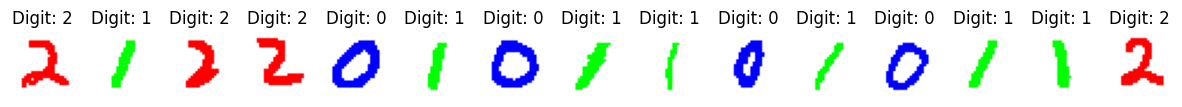

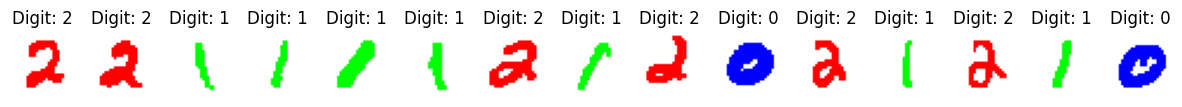

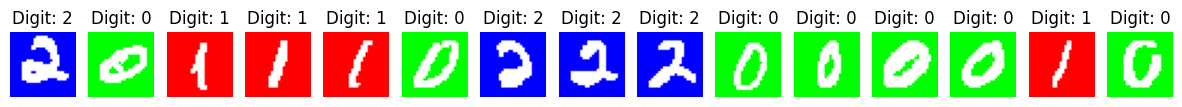

In [112]:

# # Visualize a few sample images


# # Generate 5 random indices
# random_indices = [572,577,580,581,585,1111,1112,1115,1122,1125,2472,2481,2482,2485,2487]
random_indices = np.random.randint(0, len(train_images), size=15)
# Visualize the random images
plt.figure(figsize=(15, 15))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 15, i + 1)
    plt.imshow(train_images[idx])
    plt.title(f"Digit: {train_digits[idx]}")
    plt.axis('off')

# Generate 5 random indices
random_indices = np.random.randint(0, len(test_images_1), size=15)
# random_indices = [1000, 2000, 3000]

# Visualize the random images
plt.figure(figsize=(15, 15))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 15, i + 1)
    plt.imshow(test_images_1[idx])
    plt.title(f"Digit: {test_digits_1[idx]}")
    plt.axis('off')

# Generate 5 random indices
random_indices = np.random.randint(0, len(test_images_2), size=15)
array_3d = np.ones((28, 28, 3))
# Visualize the random images
plt.figure(figsize=(15, 15))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 15, i + 1)
    plt.imshow(test_images_2[idx])
    plt.title(f"Digit: {test_digits_2[idx]}")
    plt.axis('off')
    # np.where(image == color1, color2, np.where(image == color2, color1, image))

# # Generate 5 random indices
# random_indices = np.random.randint(0, len(gray_test_images_1), size=15)
# # Visualize the random images
# plt.figure(figsize=(15, 15))
# for i, idx in enumerate(random_indices):
#     plt.subplot(1, 15, i + 1)
#     plt.imshow(gray_test_images_1[idx])
#     plt.title(f"Digit: {test_digits_1[idx]}")
#     plt.axis('off')

# # Generate 5 random indices
# random_indices = np.random.randint(0, len(gray_test_images_2), size=15)
# # array_3d = np.ones((28, 28, 3))
# # Visualize the random images
# plt.figure(figsize=(15, 15))
# for i, idx in enumerate(random_indices):
#     plt.subplot(1, 15, i + 1)
#     plt.imshow(gray_test_images_2[idx])
#     plt.title(f"Digit: {test_digits_2[idx]}")
#     plt.axis('off')

# print(gray_test_images_1[0], gray_test_images_2[0])
# for i in [572, 1111, 2472]:
    # print(train_images[i][0][0])
    # print(test_images_1[i][0][0])
    # print(test_images_2[i][0][0])

In [97]:
# plt.imshow(np.dot(train_images[1][..., :3], [0.2989, 0.5870, 0.1140]))

In [98]:
# plt.imshow(np.dot(test_images_1[2][..., :3], [0.2989, 0.5870, 0.1140]))
# plt.imshow(test_images_1[2])
# print(test_images_1[2][14])

In [99]:
# plt.imshow(np.dot(1-test_images_2[2][..., :3], [0.2989, 0.5870, 0.1140]))
# plt.imshow(1-test_images_2[2])
# print(test_images_2[2][14])

In [100]:
# print(set(train_digits))
# print(set(test_digits_1))
# print(set(test_digits_2))

In [101]:

# # Visualize a few sample images
# # Generate 5 random indices
# random_indices = np.random.randint(0, len(gray_train_images), size=15)

# # Visualize the random images
# plt.figure(figsize=(15, 15))
# for i, idx in enumerate(random_indices):
#     plt.subplot(1, 15, i + 1)
#     plt.imshow(gray_train_images[idx])
#     plt.title(f"Digit: {train_digits[idx]}")
#     plt.axis('off')

# # Generate 5 random indices
# random_indices = np.random.randint(0, len(gray_test_images_1), size=15)

# # Visualize the random images
# plt.figure(figsize=(15, 15))
# for i, idx in enumerate(random_indices):
#     plt.subplot(1, 15, i + 1)
#     plt.imshow(gray_test_images_1[idx])
#     plt.title(f"Digit: {test_digits_1[idx]}")
#     plt.axis('off')

# # Generate 5 random indices
# random_indices = np.random.randint(0, len(gray_test_images_2), size=15)
# # array_3d = np.ones((28, 28, 3))
# # Visualize the random images
# plt.figure(figsize=(15, 15))
# for i, idx in enumerate(random_indices):
#     plt.subplot(1, 15, i + 1)
#     plt.imshow(gray_test_images_2[idx])
#     plt.title(f"Digit: {test_digits_2[idx]}")
#     plt.axis('off')

In [102]:
# Flatten the images
gray_train_images_flat = gray_train_images.reshape(gray_train_images.shape[0], -1)
gray_test_images_1_flat = gray_test_images_1.reshape(gray_test_images_1.shape[0], -1)
gray_test_images_2_flat = gray_test_images_2.reshape(gray_test_images_2.shape[0], -1)

train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_1_flat = test_images_1.reshape(test_images_1.shape[0], -1)
test_images_2_flat = test_images_2.reshape(test_images_2.shape[0], -1)

In [110]:
# Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (200,), (50, 50), (100, 50)],
#     'alpha': [0.0001, 0.001, 0.01, 0.1],
#     'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
#     'activation': ['relu', 'tanh']
# }
# param_grid = {
#     'hidden_layer_sizes': [(120,80,40)],
# }
param_grid = {
    'hidden_layer_sizes': [(3)],
}
# Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (120, 80, 40), 'max_iter': 300}
# Initialize and train the MLPClassifier
mlp = MLPClassifier(solver='sgd', early_stopping=True)
grid_search = GridSearchCV(mlp, param_grid, scoring='accuracy', verbose=5)

# # Perform cross-validation on the training data
# kf = KFold(n_splits=10, shuffle=True, random_state=42)
# cv_scores = cross_val_score(mlp, train_images_flat, train_digits, cv=kf, scoring='accuracy')

# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores))

# mlp.fit(train_images_flat, train_digits)

# # Evaluate on the first test set
# predictions_1 = mlp.predict(test_images_1_flat)
# accuracy_1 = accuracy_score(test_digits_1, predictions_1)
# print("Accuracy on test set 1:", accuracy_1)

# # Evaluate on the second test set
# predictions_2 = mlp.predict(test_images_2_flat)
# accuracy_2 = accuracy_score(test_digits_2, predictions_2)
# print("Accuracy on test set 2:", accuracy_2)


# train_images_flat1, _, train_digits1, _ = train_test_split(train_images_flat, train_digits, test_size=0.000000001, random_state=42)
grid_search.fit(train_images_flat, train_digits)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate on the first test set using the best model
best_model = grid_search
predictions_1 = best_model.predict(test_images_1_flat)
accuracy_1 = accuracy_score(test_digits_1, predictions_1)
print("Accuracy on test set 1:", accuracy_1)

# Evaluate on the second test set using the best model
predictions_2 = best_model.predict(test_images_2_flat)
accuracy_2 = accuracy_score(test_digits_2, predictions_2)
print("Accuracy on test set 2:", accuracy_2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..............hidden_layer_sizes=3;, score=0.626 total time=   0.4s
[CV 2/5] END ..............hidden_layer_sizes=3;, score=0.666 total time=   0.5s
[CV 3/5] END ..............hidden_layer_sizes=3;, score=0.998 total time=   0.3s
[CV 4/5] END ..............hidden_layer_sizes=3;, score=0.319 total time=   0.3s
[CV 5/5] END ..............hidden_layer_sizes=3;, score=0.624 total time=   0.3s
Best hyperparameters: {'hidden_layer_sizes': 3}
Accuracy on test set 1: 0.9987289482046393
Accuracy on test set 2: 0.4369240546552272


In [111]:
for i in test_digits_2:
    print(i, end=', ')
print()
for i in predictions_2:
    print(i, end=', ')

2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

#Observations



From images plotted above, it's observed that test set 1 is a subset of the training set (hence higher accuracy) and both sets contain numbers written in RGB colors on white background. Set 2 is the opposite where white numbers are written on colored background which isn't a part of training set (hence low accuracy). It also seems the network is learning colors by mapping it to numbers instead of numbers themselves.

In [105]:
# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'hidden_layer_sizes': [(250, )],
#     'activation': ['relu', 'tanh']
# }

# # Initialize and train the MLPClassifier
# mlp = MLPClassifier(solver='sgd') #, max_iter=1000
# grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=5)

# grid_search.fit(train_images_flat, train_digits)

# # Print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)

# # Evaluate on the first test set using the best model
# best_model = grid_search
# predictions_1 = best_model.predict(test_images_1_flat)
# accuracy_1 = accuracy_score(test_digits_1, predictions_1)
# print("Accuracy on test set 1:", accuracy_1)

# # Evaluate on the second test set using the best model
# predictions_2 = best_model.predict(test_images_2_flat)
# accuracy_2 = accuracy_score(test_digits_2, predictions_2)
# print("Accuracy on test set 2:", accuracy_2)

In [106]:
# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (200,), (50, 50), (100, 50)],
#     'alpha': [0.0001, 0.001, 0.01, 0.1],
#     'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
#     'activation': ['relu', 'tanh']
# }

# # Initialize and train the MLPClassifier
# mlp = MLPClassifier(solver='sgd') #, max_iter=1000
# grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=5)

# # # Perform cross-validation on the training data
# # kf = KFold(n_splits=10, shuffle=True, random_state=42)
# # cv_scores = cross_val_score(mlp, train_images_flat, train_digits, cv=kf, scoring='accuracy')

# # print("Cross-Validation Scores:", cv_scores)
# # print("Mean Accuracy:", np.mean(cv_scores))

# # mlp.fit(train_images_flat, train_digits)

# # # Evaluate on the first test set
# # predictions_1 = mlp.predict(test_images_1_flat)
# # accuracy_1 = accuracy_score(test_digits_1, predictions_1)
# # print("Accuracy on test set 1:", accuracy_1)

# # # Evaluate on the second test set
# # predictions_2 = mlp.predict(test_images_2_flat)
# # accuracy_2 = accuracy_score(test_digits_2, predictions_2)
# # print("Accuracy on test set 2:", accuracy_2)



# grid_search.fit(train_images_flat, train_digits)

# # Print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)
# # Best hyperparameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (300,), 'learning_rate_init': 0.01}

# # Evaluate on the first test set using the best model
# best_model = grid_search
# predictions_1 = best_model.predict(test_images_1_flat)
# accuracy_1 = accuracy_score(test_digits_1, predictions_1)
# print("Accuracy on test set 1:", accuracy_1)

# # Evaluate on the second test set using the best model
# predictions_2 = best_model.predict(test_images_2_flat)
# accuracy_2 = accuracy_score(test_digits_2, predictions_2)
# print("Accuracy on test set 2:", accuracy_2)

In [107]:
# # Hyperparameter tuning using GridSearchCV
# # param_grid = {
# #     'hidden_layer_sizes': [(50,), (100,), (200,), (50, 50), (100, 50)],
# #     'alpha': [0.0001, 0.001, 0.01, 0.1],
# #     'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
# #     'activation': ['relu', 'tanh']
# # }
# # param_grid = {
# #     'hidden_layer_sizes': [(120,80,40)],
# # }
# param_grid = {
#     'hidden_layer_sizes': [(9, 9)],
# }
# # Best hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (120, 80, 40), 'max_iter': 300}
# # Initialize and train the MLPClassifier
# mlp = MLPClassifier(solver='sgd')
# grid_search = GridSearchCV(mlp, param_grid, scoring='accuracy', verbose=5)

# # # Perform cross-validation on the training data
# # kf = KFold(n_splits=10, shuffle=True, random_state=42)
# # cv_scores = cross_val_score(mlp, train_images_flat, train_digits, cv=kf, scoring='accuracy')

# # print("Cross-Validation Scores:", cv_scores)
# # print("Mean Accuracy:", np.mean(cv_scores))

# # mlp.fit(train_images_flat, train_digits)

# # # Evaluate on the first test set
# # predictions_1 = mlp.predict(test_images_1_flat)
# # accuracy_1 = accuracy_score(test_digits_1, predictions_1)
# # print("Accuracy on test set 1:", accuracy_1)

# # # Evaluate on the second test set
# # predictions_2 = mlp.predict(test_images_2_flat)
# # accuracy_2 = accuracy_score(test_digits_2, predictions_2)
# # print("Accuracy on test set 2:", accuracy_2)


# # gray_train_images_flat, _, train_digits, _ = train_test_split(gray_train_images_flat, train_digits, test_size=0.000001, random_state=42)
# grid_search.fit(gray_train_images_flat, train_digits)

# # Print the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)

# # Evaluate on the first test set using the best model
# best_model = grid_search
# predictions_1 = best_model.predict(gray_test_images_1_flat)
# accuracy_1 = accuracy_score(test_digits_1, predictions_1)
# print("Accuracy on test set 1:", accuracy_1)

# # Evaluate on the second test set using the best model
# predictions_2 = best_model.predict(gray_test_images_2_flat)
# accuracy_2 = accuracy_score(test_digits_2, predictions_2)
# print("Accuracy on test set 2:", accuracy_2)

In [108]:
# for i in test_digits_2:
#     print(i, end=', ')
# print()
# for i in predictions_2:
#     print(i, end=', ')